In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

ModuleNotFoundError: No module named 'numpy'

In [2]:
!pip install numpy pandas tensorflow

  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------------------------ --------- 8.4/11.0 MB 41.2 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 35.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 8.9/332.0 MB 41.8 MB/s eta 0:00:08
   -- ------------------------------------- 17.8/332.0 MB 41.7 MB/s eta 0:00:08
   --- ------------------------------------ 28.0/332.0 MB 43.9 MB/s eta 0:00:07
   ---- ----------------------------------- 39.1/332.0 MB 45.7 MB/s eta 0:00:07
   ----- ---------------------------------- 46.1/332.0 MB 43.8 MB/s eta 0:00:07
   ------ ------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [5]:
dataset = pd.read_csv('Exp_Mn_Mw_Value.txt')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
dataset.head()

,Run\tFactor A\tFactor B\tFactor C\tFactor D\tResponse 1 (Experimental)\tResponse 2 (Experimental)
0,1\t110\t7\t50\t10\t1127.19\t1321.65
1,2\t85\t13\t50\t10\t1024.97\t1339.35
2,3\t101\t1\t500\t60\t1950.00\t2878.90
3,4\t101\t1\t500\t60\t2223.17\t2989.00
4,5\t50\t10\t50\t10\t1845.60\t2690.50


In [7]:
dataset = pd.read_csv('Exp_Mn_Mw_Value.txt', sep='\t')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [8]:
dataset.head()

,Run,Factor A,Factor B,Factor C,Factor D,Response 1 (Experimental),Response 2 (Experimental)
0,1,110,7,50,10,1127.19,1321.65
1,2,85,13,50,10,1024.97,1339.35
2,3,101,1,500,60,1950.00,2878.90
3,4,101,1,500,60,2223.17,2989.00
4,5,50,10,50,10,1845.60,2690.50


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, shuffle=True)

ModuleNotFoundError: No module named 'sklearn'

In [10]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size = 0.2, shuffle=True)

In [14]:
ann = tf.keras.models.Sequential()

In [15]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [17]:
ann.add(tf.keras.layers.Dense(units=1))

In [19]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['MeanSquaredLogarithmicError'])

In [20]:
model = ann.fit(X_train, y_train, batch_size = 32, epochs = 25,validation_data=(X_val, y_val),
              shuffle=True)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 891ms/step - MeanSquaredLogarithmicError: 62.7566 - loss: 10070765.0000 - val_MeanSquaredLogarithmicError: 70.1296 - val_loss: 22913320.0000
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - MeanSquaredLogarithmicError: 62.7566 - loss: 9988882.0000 - val_MeanSquaredLogarithmicError: 70.1296 - val_loss: 22741956.0000
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - MeanSquaredLogarithmicError: 61.9019 - loss: 9907518.0000 - val_MeanSquaredLogarithmicError: 70.1296 - val_loss: 22571612.0000
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - MeanSquaredLogarithmicError: 59.4263 - loss: 9826672.0000 - val_MeanSquaredLogarithmicError: 70.1296 - val_loss: 22402256.0000
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - MeanSquaredLogarithmicError: 53.9807 - loss: 9746325.0000 - val_MeanSquaredLogarithmicError: 70.1296 - val_loss: 22233804.0000
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - MeanSquaredLogarithmicError: 51.9951 - loss: 9666434.0000

In [21]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[ 176.15 2689.91]
 [ 290.36 2965.54]
 [ 140.47 1456.22]
 [ 216.53 2970.82]
 [ 443.07 5921.49]]


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [23]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [24]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------------------------- ------------ 5.5/8.1 MB 27.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 23.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 37.7 MB/s eta 0:00:00

   ---------------------------------------- 0/6 [pyparsing]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
import sklearn.metrics
evs_no=sklearn.metrics.explained_variance_score(y_test,ann.predict(X_test))
me_no=sklearn.metrics.max_error(y_test,ann.predict(X_test))
mae_no=sklearn.metrics.mean_absolute_error(y_test,ann.predict(X_test))
mse_no=sklearn.metrics.mean_squared_error(y_test,ann.predict(X_test))
msle_no=sklearn.metrics.mean_squared_log_error(y_test,ann.predict(X_test))
Mae_no=sklearn.metrics.median_absolute_error(y_test,ann.predict(X_test))
r2_no=sklearn.metrics.r2_score(y_test,ann.predict(X_test))
mpd_no=sklearn.metrics.mean_poisson_deviance(y_test,ann.predict(X_test))
mgd_no=sklearn.metrics.mean_gamma_deviance(y_test,ann.predict(X_test))
mtd_no=sklearn.metrics.mean_tweedie_deviance(y_test,ann.predict(X_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [27]:
print('Explained Variance Score:',evs_no)
print('Max Error               :',me_no)
print('Mean Absolute Error     :',mae_no)
print('Mean Square Error       :',mse_no)
print('Mean Squared Log Error  :',msle_no)
print('Median Absolute Error   :',Mae_no)
print('R2 Score                :',r2_no)
print('Mean Poisson Deviance   :',mpd_no)
print('Mean Gamma Deviance     :',mgd_no)
print('Mean Tweedie Deviance   :',mtd_no)

Explained Variance Score: 0.13381394341214548
Max Error               : 5478.417795410156
Mean Absolute Error     : 2947.479218383789
Mean Square Error       : 10561187.27320804
Mean Squared Log Error  : 6.354616657677937
Median Absolute Error   : 2675.1785192871093
R2 Score                : -3.882675092338909
Mean Poisson Deviance   : 10409.561910483646
Mean Gamma Deviance     : 18.13428579354375
Mean Tweedie Deviance   : 10561187.27320804


dict_keys(['MeanSquaredLogarithmicError', 'loss', 'val_MeanSquaredLogarithmicError', 'val_loss'])


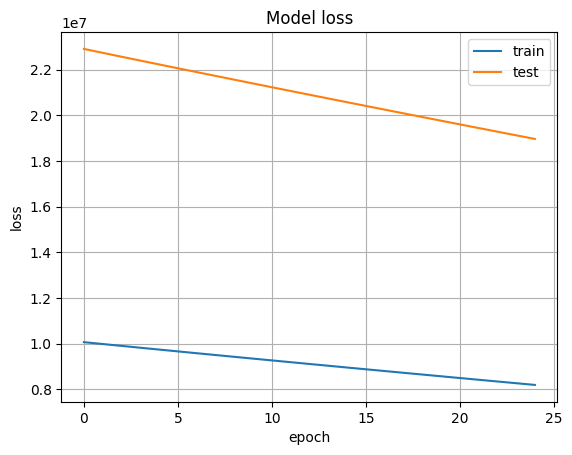

KeyError: 'mean_squared_logarithmic_error'

In [28]:
# list all data in history
print(model.history.keys())
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model.history['mean_squared_logarithmic_error'])
plt.plot(model.history['val_mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [29]:
# List available history keys
print(model.history.history.keys())

# Plot loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

# Plot MAE (adjust based on what's available)
plt.plot(model.history.history['mean_absolute_error'])
plt.plot(model.history.history['val_mean_absolute_error'])
plt.grid()
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()


AttributeError: 'dict' object has no attribute 'history'

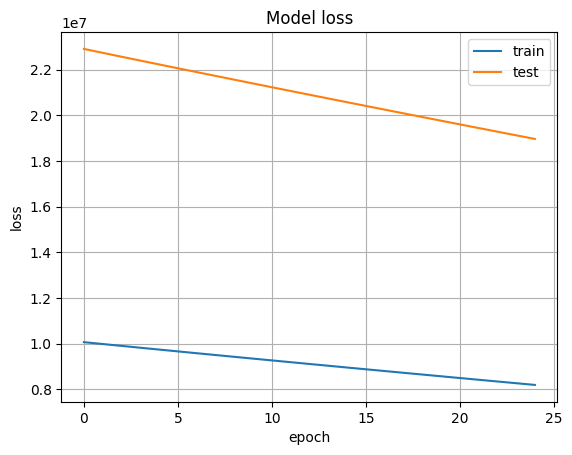

KeyError: 'mean_squared_logarithmic_error'

In [30]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.grid()
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model.history['mean_squared_logarithmic_error'])
plt.plot(model.history['val_mean_squared_logarithmic_error'])
plt.grid()
plt.title('model Mean Squared Logarithmic Error')
plt.ylabel('mean_squared_logarithmic_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()